# Bollinger Bands Evaluator

This portion of the code evaluates the AAPL dataset from Kaggle telling us the way to evaluate Bollinger bands based on the requirements of the various ML model input datas. The model would need the following inputs from Bollinger Bands:
1. upper bound of 20d bollinger bands
2. lower bound of 20d bollinger bands

### Import necessary libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

### Showcase the information as Bollinger Bands within a chart

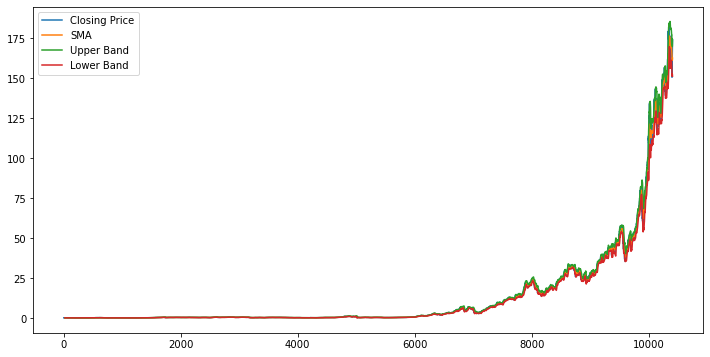

In [29]:
df = pd.read_csv('AAPL_clean.csv')

# Calculate the 20-day SMA and standard deviation
df['SMA'] = df['Close'].rolling(window=20).mean()
df['STD'] = df['Close'].rolling(window=20).std()

# Calculate the upper and lower Bollinger Bands
df['UpperBand'] = df['SMA'] + (df['STD'] * 2)
df['LowerBand'] = df['SMA'] - (df['STD'] * 2)

# Plot the Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['SMA'], label='SMA')
plt.plot(df['UpperBand'], label='Upper Band')
plt.plot(df['LowerBand'], label='Lower Band')
plt.legend()
plt.show()

In [30]:
df2 = pd.DataFrame()
df2 = df.iloc[19:].copy()
df2['Max_Min_diff'] = df2['High']-df2['Low']
df2['Open_Close_diff'] = df2['Open']-df2['Close']
df2 = df2[['Date', 'UpperBand', 'LowerBand', 'Max_Min_diff','Open_Close_diff', 'SMA']].copy()
df2 = df2.rename(columns={'UpperBand': 'BB_upperband'})
df2 = df2.rename(columns={'LowerBand': 'BB_lowerband'})
df2.head()
Bollinger_df = df2.copy()

%store Bollinger_df

Stored 'Bollinger_df' (DataFrame)


In [31]:
%store -r HnS_df

In [32]:
HnS_new_df = HnS_df.loc[:, ['left_shoulder', 'right_shoulder', 'left_shoulder_diff', 'right_shoulder_diff', 'head_shoulders']]

In [33]:
HnS_new_df.iloc[50:].head()

,left_shoulder,right_shoulder,left_shoulder_diff,right_shoulder_diff,head_shoulders
50,0.138951,0.120536,-0.131818,0.018181,1
51,0.133929,0.120536,-0.090911,0.018181,1
52,0.128906,0.120536,-0.049997,0.018181,1
53,0.128906,0.120536,-0.049997,0.018181,1
54,0.128906,0.120536,-0.049997,0.018181,1


In [34]:
combined_df = pd.concat([df2, HnS_new_df], axis=0)

In [35]:
combined_df.iloc[100:].head()

,Date,BB_upperband,BB_lowerband,Max_Min_diff,Open_Close_diff,SMA,left_shoulder,right_shoulder,left_shoulder_diff,right_shoulder_diff,head_shoulders
119,1981-06-04,0.154373,0.111699,0.000558,0.000000,0.133036,NaN,NaN,NaN,NaN,NaN
120,1981-06-05,0.155078,0.112724,0.000558,0.000558,0.133901,NaN,NaN,NaN,NaN,NaN
121,1981-06-08,0.155233,0.113685,0.000558,0.000558,0.134459,NaN,NaN,NaN,NaN,NaN
122,1981-06-09,0.155327,0.115264,0.000558,0.000000,0.135296,NaN,NaN,NaN,NaN,NaN
123,1981-06-10,0.155390,0.117043,0.001674,0.000000,0.136217,NaN,NaN,NaN,NaN,NaN
